# Исследование надежности заемщиков.

**Цель исследования** — проверка гипотезы: влияет ли семейное положение и количество детей клиента на погашение кредита в срок.


### Шаг 1. Обзор данных

In [1]:
#Импортирт библиотек pandas и seaborn
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#Чтение файла с данными и сохранение в data
data = pd.read_csv('/datasets/data.csv')

In [3]:
#Ознакомимся с данными в таблице методом head
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
#Получение общей информации о данных в data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице двенадцать столбцов.

Два столбца типа `float64`, пять столбцов типа `int64` и пять столбцов типа `object`.



Согласно документации к данным: 
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита


<b>Рассмотрим подробно данные в каждом столбце </b>

In [5]:
# Вывод на экран количества уникалиных зачений в каждом столбце
for column in data:
    display('Столбец ' + column + ':', data[column].value_counts())

'Столбец children:'

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

'Столбец days_employed:'

-327.685916     1
-1580.622577    1
-4122.460569    1
-2828.237691    1
-2636.090517    1
               ..
-7120.517564    1
-2146.884040    1
-881.454684     1
-794.666350     1
-3382.113891    1
Name: days_employed, Length: 19351, dtype: int64

'Столбец dob_years:'

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

'Столбец education:'

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

'Столбец education_id:'

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

'Столбец family_status:'

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

'Столбец family_status_id:'

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

'Столбец gender:'

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

'Столбец income_type:'

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

'Столбец debt:'

0    19784
1     1741
Name: debt, dtype: int64

'Столбец total_income:'

169846.427535    1
257737.077768    1
200508.675866    1
106196.235958    1
248730.171354    1
                ..
175057.266090    1
101516.604975    1
239154.168013    1
165009.733021    1
189255.286637    1
Name: total_income, Length: 19351, dtype: int64

'Столбец purpose:'

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

<b>Вывод обзора данных: </b></br>
1. В столбце `children` встречаются аномальные значения -1 и 20.
2. В столбце `days_employed` встречаются отрицательные значения.
3. В столбцах `days_employed` и `total_income` имеются пропуски в значениях. В каждом из этих столбцов 2174 пропуска. Это составдяет 1/10 часть данных в каждом из столбцов.
4. В столбце `dob_years` есть аномальное значение 0.
5. В столбце `education` встречаются дубликаты записанные в разном ренистре.
6. В столбце `gender` есть одно незаполненное значение.
7. В столбце `total_income` значение запрлаты встречается 2175 раз. Все остальные значения уникальные.
8. В столбце `purpose` встречеются дубликаты похожие по смыслу, но отличающиеся по формулировке цели.</br>

In [6]:
# Анализ данных в датафрейме методом describe()
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### Шаг 2.1 Заполнение пропусков

Заполним пропуски в значениях в столбце `total_income` медианным значением. Предпочтительниее использовать медианное значение для заполнения количественных данных, т.к. она показывает середину из отсортированных значений списка.

In [7]:
#Замена пропусков в значениях столбца total_income на мединное знаение
#data['total_income'] = data['total_income'].fillna(data['total_income'].median())

In [8]:
#Замена пропусков в значениях столбца total_income на мединное знаение в зависимости от типа занятости
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))

In [9]:
# Проверка заполнения пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [10]:
#Создание переменнай days_employed_median и запись в неё медианного значения столбца total_income
days_employed_median = data['days_employed'].median()
days_employed_median

-1203.369528770489

Из-за неправильно заполненных данных медианное значение трудового стажа получается отрицательным. Нужно заменить отрицательные значения в столбце `days_employed` на положительные.

### Шаг 2.2 Проверка данных на аномалии и исправления.

В данных могут встречаться аномалии — значения, которые не отражают действительность и появились по какой-то ошибке. Например, отрицательное количество дней трудового стажа в столбце `days_employed`.

In [11]:
#Замена отрицательных значений в столбце days_employed
#data.loc[data['days_employed'] < 0, 'days_employed'] = data['days_employed'] * -1
data['days_employed'] = data['days_employed'].abs()
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [12]:
#Замена пропусков в значениях столбца days_employed на мединное знаение
data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median())

In [13]:
# Уникальные значения столбца children
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Из полученных данных из столбца `children` следует:
* `14167` клиентов банка — бездетные;
* `4855` клиентов банка — имеют одного ребенка;
* `2052` клиентов банка — имеют два ребенка;
* `330` клинтов банка — имеют три ребенка;
* `41` клиент банка — имеет четыре ребенка;
* `9` клиентов банка — имеет пять детей.

Также в данных наблюдаются две аномалии:
* `76` клиентов банка — имеют 20 детей:
* `47` клиентов банка — имеют -1 ребенка.

Возможная причина аномалии клиентов банка с 20 детьми — человеческий фактор.</br>
Человек заполняющий таблицу, опечатался при заполнении и слуайно задел клавишу 2 или 0, т.к. они находятся рядом на цифровой клавиатуре.</br>
Так как количество бездетных клиентов банка почти в семь раз больше, чем с двумя детьми, поэтому более вероятно, что чаще нажимали 0 и случайно задевали 2.</br> 
Исходя из этого следует заменить 20 на 0 в столбце `children`.

Так как -1 ребенка быть неможет. Скорее всего имелся в виду один ребенок.</br>
Исходя из этого следует заменить -1 на 1 в столбце `children`.

In [14]:
#Замена значений в столбце children
data.loc[data['children'] == -1, 'children'] = 1
data.loc[data['children'] == 20, 'children'] = 0
data['children'].value_counts()

0    14225
1     4865
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [15]:
#Получение данных о среднем трудовом страже в годах
data['days_employed'].mean() / 365 

165.41926776297888

Средний трудовой стаж не может быть `165` лет!</br>
Значит в данных есть аномалия.

<AxesSubplot:xlabel='days_employed', ylabel='Density'>

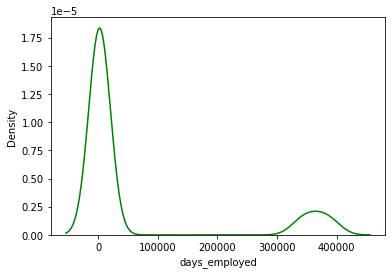

In [16]:
# Построение графика плотности данных в столбце трудового стажа days_employed
sns.kdeplot(data['days_employed'], color='green')

<AxesSubplot:xlabel='days_employed', ylabel='Density'>

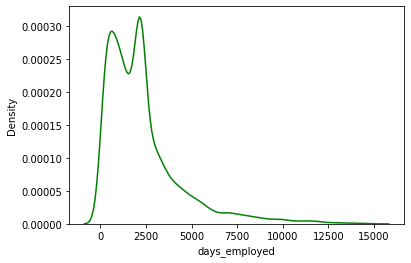

In [17]:
# Построение графика плотности данных в столбце трудового стажа days_employed правильных данных
sns.kdeplot(data.query('days_employed < 15000')['days_employed'], color='green')

<AxesSubplot:xlabel='days_employed', ylabel='Density'>

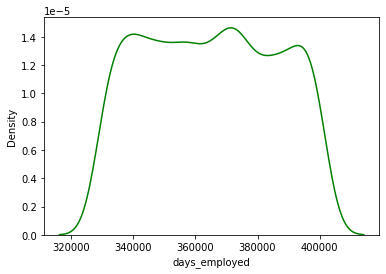

In [18]:
# Построение графика плотности данных в столбце трудового стажа days_employed данных с аномальными значениями
sns.kdeplot(data.query('days_employed > 100000')['days_employed'], color='green')

In [19]:
# Получение данных с какого значения начинаются аномальные значения
data.loc[data['days_employed'] > 50000, 'days_employed'].min()

328728.72060451825

На графике видим появление аномальных значений начиная с 328728 дней трудового стажа.</br>
Возможная причина данной аномалии данных, в ошибке при выгрузке данных с плавающей точкой, если разделить аномальные значения на 100, то получим данные, которые могли бы быть истинными

In [20]:
# Деление аномальных значений дней трудового стажа на 100 
data.loc[data['days_employed'] > 22000, 'days_employed'] = data['days_employed'] / 100

In [21]:
# Проверка максимального трудового стажа в годах
data['days_employed'].max() / 365

50.38068465909146

In [22]:
#Получение данных о медианном трудовом страже в годах
data['days_employed'].median() / 365

6.0115631969279315

### Шаг 2.3. Изменение типов данных.

In [23]:
# Замена вещественного типа данных на целочисленный в столбце total_income
data['total_income'] = data['total_income'].astype('int')
data.info()
data['total_income']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int64  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21525, dtype: int64

### Шаг 2.4. Удаление дубликатов.

In [24]:
# Количество уникальных хначений столбца education
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [25]:
# Приведение всех значений столбца education к нижнему регистру
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [26]:
# Проверка данных на дубликаты
data.duplicated().sum()

71

In [27]:
# Удаление дубликатов методом drop_duplicates() и сброс индексов
data = data.drop_duplicates().reset_index(drop=True)

In [28]:
# Проверка удаления дубликатов в данных
data.duplicated().sum()

0

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [29]:
# Создание словаря с данными из столбцов education и education_id из исходного датафрейма
education_dict = data[['education', 'education_id']]
education_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   education     21454 non-null  object
 1   education_id  21454 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 335.3+ KB


In [30]:
# Создание словаря с данными из столбцов family_status и family_status_id из исходного датафрейма
family_status_dict = data[['family_status', 'family_status_id']]
family_status_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   family_status     21454 non-null  object
 1   family_status_id  21454 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 335.3+ KB


In [31]:
# Удаление из исходного датофрейма столбцов education и family_status
data.pop('education')
data.pop('family_status')

0         женат / замужем
1         женат / замужем
2         женат / замужем
3         женат / замужем
4        гражданский брак
               ...       
21449    гражданский брак
21450     женат / замужем
21451    гражданский брак
21452     женат / замужем
21453     женат / замужем
Name: family_status, Length: 21454, dtype: object

In [32]:
# Проверка удаления столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education_id      21454 non-null  int64  
 4   family_status_id  21454 non-null  int64  
 5   gender            21454 non-null  object 
 6   income_type       21454 non-null  object 
 7   debt              21454 non-null  int64  
 8   total_income      21454 non-null  int64  
 9   purpose           21454 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 1.6+ MB


### Шаг 2.6. Категоризация дохода.

Создание столбца `total_income_category` с категориями:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.


In [33]:
# Заполнение нового столбца total_income_category

data.loc[data['total_income'] <= 30000, 'total_income_category'] = 'E'
data.loc[(data['total_income'] > 30000) & (data['total_income'] <= 50000), 'total_income_category'] = 'D'
data.loc[(data['total_income'] > 50000) & (data['total_income'] <= 200000), 'total_income_category'] = 'C'
data.loc[(data['total_income'] > 200000) & (data['total_income'] <= 1000000), 'total_income_category'] = 'B'
data.loc[data['total_income'] > 1000000, 'total_income_category'] = 'A'
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,3402.660720,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Шаг 2.7. Категоризация целей кредита.

Создание функции, которая создаст новый столбец `purpose_category`, и на основе столбца `purpose` заполнит его значениями, в который войдут слежующие категории:
* операции с автомобилем
* операции с недвижимостью
* проведение свадьбы
* получение образования

In [34]:
# Создание функции
def purpose_group(purpose):
    
    if purpose.find('автомоб') != -1:
        return 'операции с автомобилем'
    
    if (purpose.find('недвижимост') != -1) or (purpose.find('жиль') != -1):
        return 'операции с недвижимостью'
    
    if purpose.find('свадьб') != -1:
        return 'проведение свадьбы'
    
    if purpose.find('образов') != -1:
        return 'получение образования'
        
 #   
data['purpose_category'] = data['purpose'].apply(purpose_group)

In [35]:
# Проверка рабыты функции
data[:10]

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,3402.660720,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,1,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [36]:
pivot_data_children = data.pivot_table(index=['debt'], 
                                       values='total_income', 
                                       columns='children', 
                                       aggfunc='count')

In [37]:
display('Процент просрочеки кредита у бездетных: {0:.2f}%'
        .format(pivot_data_children[0][1] / 
                (pivot_data_children[0][0] + pivot_data_children[0][1]) * 
                100))
display('Процент просрочеки кредита у клиентов имеющих одного ребенка: {0:.2f}%'
        .format(pivot_data_children[1][1] / 
                (pivot_data_children[1][0] + pivot_data_children[1][1]) * 
                100))
display('Процент просрочеки кредита у клиентов имеющих двух детей: {0:.2f}%'
        .format(pivot_data_children[2][1] /
                (pivot_data_children[2][0] + pivot_data_children[2][1]) *
                100))
display('Процент просрочеки кредита у клиентов имеющих трех детей: {0:.2f}%'
        .format(pivot_data_children[3][1] /
                (pivot_data_children[3][0] + pivot_data_children[3][1]) *
                100))
display('Процент просрочеки кредита у клиентов имеющих четырех детей: {0:.2f}%'
        .format(pivot_data_children[4][1] / 
                (pivot_data_children[4][0] + pivot_data_children[4][1]) *
                100))

'Процент просрочеки кредита у бездетных: 7.56%'

'Процент просрочеки кредита у клиентов имеющих одного ребенка: 9.17%'

'Процент просрочеки кредита у клиентов имеющих двух детей: 9.45%'

'Процент просрочеки кредита у клиентов имеющих трех детей: 8.18%'

'Процент просрочеки кредита у клиентов имеющих четырех детей: 9.76%'

##### Вывод 1: Появление ребенка увеличивает риск просрочки по кредиту.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [38]:
pivot_data_family_status = data.pivot_table(index=['debt'], 
                                               columns='family_status_id', 
                                               values='total_income', 
                                               aggfunc='count')

In [39]:
display('Процент женатых/замужних клиентов банка, просрочивших платеж по кредиту: {0:.2f}%'
        .format(pivot_data_family_status[0][1] / 
                (pivot_data_family_status[0][0] + pivot_data_family_status[0][1]) * 
                100))

display('Процент клиентов банка в гражданском браке, просрочивших платеж по кредиту: {0:.2f}%'
        .format(pivot_data_family_status[1][1] / 
                (pivot_data_family_status[1][0] + pivot_data_family_status[1][1]) *
                100))

display('Процент вдовцов/вдов клиентов банка, просрочивших платеж по кредиту: {0:.2f}%'
        .format(pivot_data_family_status[2][1] /
                (pivot_data_family_status[2][0] + pivot_data_family_status[2][1]) *
                100))

display('Процент клиентов банка в разводе, просрочивших платеж по кредиту: {0:.2f}%'
        .format(pivot_data_family_status[3][1] /
                (pivot_data_family_status[3][0] + pivot_data_family_status[3][1]) * 
                100))

display('Процент не женатых/не замужних клиентов банка, просрочивших платеж по кредиту: {0:.2f}%'
        .format(pivot_data_family_status[4][1] / 
                (pivot_data_family_status[4][0] + pivot_data_family_status[4][1]) * 
                100))

'Процент женатых/замужних клиентов банка, просрочивших платеж по кредиту: 7.55%'

'Процент клиентов банка в гражданском браке, просрочивших платеж по кредиту: 9.35%'

'Процент вдовцов/вдов клиентов банка, просрочивших платеж по кредиту: 6.57%'

'Процент клиентов банка в разводе, просрочивших платеж по кредиту: 7.11%'

'Процент не женатых/не замужних клиентов банка, просрочивших платеж по кредиту: 9.75%'

##### Вывод 2: Самые рискованные для банка не женатые/не замужние клиенты и клиенты в гражданском браке.

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [40]:
pivot_data_total_income_category = data.pivot_table(index=['debt'], 
                                                    columns='total_income_category', 
                                                    values='total_income', 
                                                    aggfunc='count')

display('Процент клиентов банка с доходом 0–30000, просрочивших платеж по кредиту: {0:.2f}%'
        .format(pivot_data_total_income_category['E'][1] / 
                (pivot_data_total_income_category['E'][0] + pivot_data_total_income_category['E'][1]) * 
                100))

display('Процент клиентов банка с доходом 30001–50000, просрочивших платеж по кредиту: {0:.2f}%'
        .format(pivot_data_total_income_category['D'][1] / 
                (pivot_data_total_income_category['D'][0] + pivot_data_total_income_category['D'][1]) * 
                100))

display('Процент клиентов банка с доходом 50001–200000, просрочивших платеж по кредиту: {0:.2f}%'
        .format(pivot_data_total_income_category['C'][1] / 
                (pivot_data_total_income_category['C'][0] + pivot_data_total_income_category['C'][1]) *
                100))

display('Процент клиентов банка с доходом 200001–1000000, просрочивших платеж по кредиту: {0:.2f}%'
        .format(pivot_data_total_income_category['B'][1] / 
                (pivot_data_total_income_category['B'][0] + pivot_data_total_income_category['B'][1]) * 
                100))

display('Процент клиентов банка с доходом 1000001 и выше, просрочивших платеж по кредиту: {0:.2f}%'
        .format(pivot_data_total_income_category['A'][1] / 
                (pivot_data_total_income_category['A'][0] + pivot_data_total_income_category['A'][1]) * 
                100))

'Процент клиентов банка с доходом 0–30000, просрочивших платеж по кредиту: 9.09%'

'Процент клиентов банка с доходом 30001–50000, просрочивших платеж по кредиту: 6.00%'

'Процент клиентов банка с доходом 50001–200000, просрочивших платеж по кредиту: 8.49%'

'Процент клиентов банка с доходом 200001–1000000, просрочивших платеж по кредиту: 7.06%'

'Процент клиентов банка с доходом 1000001 и выше, просрочивших платеж по кредиту: 8.00%'

##### Вывод 3:  Наименее рискованными для банка являются клиенты с доходом от 30001 до 50000

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

In [41]:
pivot_data_total_purpose_category = data.pivot_table(index=['debt'],
                                                        columns='purpose_category',
                                                        values='total_income',
                                                        aggfunc='count')


display('Процент клинтов банка с целью кредита операции с автомобилем, просрочивших платеж: {0:.2f}%'
        .format(pivot_data_total_purpose_category['операции с автомобилем'][1] /
                (pivot_data_total_purpose_category['операции с автомобилем'][0] + 
                pivot_data_total_purpose_category['операции с автомобилем'][1]) *
                100))

display('Процент клинтов банка с целью кредита получение образования, просрочивших платеж: {0:.2f}%'
        .format(pivot_data_total_purpose_category['получение образования'][1] /
                (pivot_data_total_purpose_category['получение образования'][0] + 
                pivot_data_total_purpose_category['получение образования'][1]) * 
                100))

display('Процент клинтов банка с целью кредита проведение свадьбы, просрочивших платеж: {0:.2f}%'
        .format(pivot_data_total_purpose_category['проведение свадьбы'][1] /
                (pivot_data_total_purpose_category['проведение свадьбы'][0] +
                pivot_data_total_purpose_category['проведение свадьбы'][1]) *
                100))

display('Процент клинтов банка с целью кредита операции с недвижимостью, просрочивших платеж: {0:.2f}%'
        .format(pivot_data_total_purpose_category['операции с недвижимостью'][1] /
                (pivot_data_total_purpose_category['операции с недвижимостью'][0] +
                pivot_data_total_purpose_category['операции с недвижимостью'][1]) *
                100))

'Процент клинтов банка с целью кредита операции с автомобилем, просрочивших платеж: 9.36%'

'Процент клинтов банка с целью кредита получение образования, просрочивших платеж: 9.22%'

'Процент клинтов банка с целью кредита проведение свадьбы, просрочивших платеж: 8.00%'

'Процент клинтов банка с целью кредита операции с недвижимостью, просрочивших платеж: 7.23%'

##### Вывод 4: Наимение рискованные клиенты для банка берущие кридит с целью - операции с недвижимостью.

## Общий вывод:

В ходе исследования были:
1. Заполнены пропуски и удалены дубликаты.
2. Сформированы дополнительные датафреймы словари для декомпозиции исходного датафрейма.
3. Категоризированны данные по уровню дохода и цели кредита.
4. Применины сводные таблицы и была проведена оценка, что влияют на возврат кредита в срок. 

<b>Портрет самого безрискового клиента для банка выглядит так:</b></br> 
<b>Это бездетный вдовец/вдова с доходом от 30001 до 50000, берущий кредит на операции с недвижимостью.</b>